In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LeakyReLU, Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, PReLU

In [2]:
Train_Dir = r'F:\kaggle\Facial Keypoints Detection\input\training.csv'
Test_Dir = r'F:\kaggle\Facial Keypoints Detection\input\test.csv'
lookid_dir = r'F:\kaggle\Facial Keypoints Detection\input\IdLookupTable.csv'

In [3]:
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)


In [4]:
os.listdir(r'F:\kaggle\Facial Keypoints Detection\input')

['IdLookupTable.csv', 'test.csv', 'training.csv']

In [5]:
#train_data.head().T

In [6]:
train_data.isnull().any().value_counts()

True     28
False     3
Name: count, dtype: int64

In [7]:
#train_data.isnull().sum()

In [8]:
train_data.fillna(method='ffill', inplace=True)

C:\Users\daivi\AppData\Local\Temp\ipykernel_17612\2009382148.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


In [9]:
train_data.isnull().any().value_counts()


False    31
Name: count, dtype: int64

In [10]:
train_data.shape[0]

7049

In [11]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [12]:
#train_data['Image'][101].split(' ')

In [13]:
image = []
for i in range(0,train_data.shape[0]):
    img = train_data['Image'][i].split(' ')
    img = [0 if x == '' else x for x in img]
    image.append(img)

In [14]:
img_list = np.array(image, dtype='float')

In [15]:
X_train = img_list.reshape(-1,96,96,1)

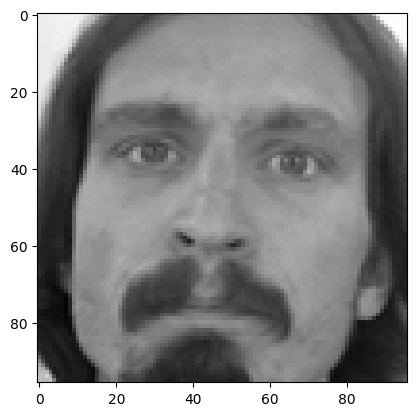

In [16]:
plt.imshow(X_train[0].reshape(96,96), cmap='gray')
plt.show()

In [17]:
training = train_data.drop('Image', axis=1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)

y_train = np.array(y_train, dtype='float')


In [52]:
model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

c:\Users\daivi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model = Sequential()

In [54]:
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(256, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU())
model.add(BatchNormalization())
          

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(512))
model.add(PReLU())
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

c:\Users\daivi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\daivi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 96, 96, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 96, 96, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 48, 48, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 48, 48, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 24, 24, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_40 (LeakyReLU)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 24, 24, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_41 (LeakyReLU)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 12, 12, 256)    │       294,91

 Total params: 14,171,198 (54.06 MB)

 Trainable params: 14,167,230 (54.04 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [55]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics= ['mae'])


In [22]:
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2) #64

Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 849.7369 - mae: 22.3928 - val_loss: 437.4640 - val_mae: 18.5536
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 166.8924 - mae: 9.8173 - val_loss: 449.5751 - val_mae: 19.4351
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 117.6303 - mae: 8.2376 - val_loss: 104.1873 - val_mae: 9.1262


In [33]:
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2) #128

Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - loss: 595.6146 - mae: 17.6375 - val_loss: 1675.6200 - val_mae: 37.8985
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - loss: 97.8500 - mae: 7.7309 - val_loss: 772.7635 - val_mae: 25.7162
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - loss: 78.9343 - mae: 6.9374 - val_loss: 235.4351 - val_mae: 14.0875


In [39]:
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2) #128

Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - loss: 530.3638 - mae: 15.7711 - val_loss: 1452.3936 - val_mae: 34.3721
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - loss: 54.7088 - mae: 5.7905 - val_loss: 434.0482 - val_mae: 19.0000
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - loss: 46.0822 - mae: 5.3069 - val_loss: 138.9048 - val_mae: 10.5115


In [45]:
model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2) #256  with PReLU activation

Epoch 1/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - loss: 522.7686 - mae: 15.7268 - val_loss: 1917.3029 - val_mae: 40.2357
Epoch 2/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - loss: 58.9444 - mae: 6.0162 - val_loss: 1107.6125 - val_mae: 30.2417
Epoch 3/3
45/45 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - loss: 41.1497 - mae: 5.0038 - val_loss: 125.7760 - val_mae: 9.7516


In [57]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2) #512 with PReLU

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - loss: 22.3510 - mae: 3.6390 - val_loss: 57.8626 - val_mae: 6.7265
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - loss: 20.1965 - mae: 3.4683 - val_loss: 18.7552 - val_mae: 3.5698
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - loss: 18.8730 - mae: 3.2977 - val_loss: 12.9481 - val_mae: 2.8539
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - loss: 18.2305 - mae: 3.2784 - val_loss: 6.5304 - val_mae: 1.8285
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - loss: 13.2440 - mae: 2.7416 - val_loss: 5.3063 - val_mae: 1.5460
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - loss: 13.2043 - mae: 2.7608 - val_loss: 5.1530 - val_mae: 1.4901
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - loss: 17.0321 - mae: 3.1015 - val_loss: 8.1460 - val_mae: 2.0616
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - loss: 9.8523 - mae: 2.3571 - val_loss: 15.8883 - val_mae: 3.0617
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - 

In [59]:
test_data.shape[0]

1783

In [60]:
test_image = []

for i in range(0,1783):
    temp = test_data['Image'][i].split(' ')
    temp = ['0' if k=='' else k for k in temp]

    test_image.append(temp)



In [61]:
test_image_list = np.array(test_image, dtype='float')
X_test = test_image_list.reshape(-1,96,96,1)

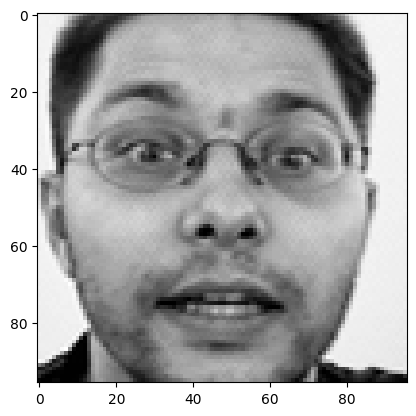

In [62]:
plt.imshow(X_test[0].reshape(96,96), cmap='gray')

In [64]:
pred = model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step


In [66]:
lookid_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [65]:
rowid = lookid_data['RowId']
imageID = list(lookid_data['ImageId'] - 1)
lookid_list = list(lookid_data['FeatureName'])
feature = [lookid_list.index(f) for f in lookid_data['FeatureName']]

In [67]:
pre_list = list(pred)
preded = [pre_list[x][y] for x, y in zip(imageID, feature)]

submission = pd.DataFrame({'RowId': rowid, 'Location': preded})

In [68]:
submission.to_csv('face_key_detection_submission.csv', index=False)